# HOMEWORK 5: TEXT CLASSIFICATION
In this homework, you will create models to classify texts from TRUE call-center. There are two classification tasks:
1. Action Classification: Identify which action the customer would like to take (e.g. enquire, report, cancle)
2. Object Classification: Identify which object the customer is referring to (e.g. payment, truemoney, internet, roaming) 

In this homework, you are asked to do the following tasks:
1. Data Cleaning
2. Preprocessing data for keras
3. Build and evaluate a model for "action" classification
4. Build and evaluate a model for "object" classification
5. Build and evaluate a multi-task model that does both "action" and "object" classifications in one-go 


Note: we have removed phone numbers from the dataset for privacy purposes. 

In [ ]:
!wget --no-check-certificate https://www.dropbox.com/s/37u83g55p19kvrl/clean-phone-data-for-students.csv

--2021-03-02 07:09:55--  https://www.dropbox.com/s/37u83g55p19kvrl/clean-phone-data-for-students.csv
Resolving www.dropbox.com (www.dropbox.com)... 162.125.64.18, 2620:100:6020:18::a27d:4012
Connecting to www.dropbox.com (www.dropbox.com)|162.125.64.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/37u83g55p19kvrl/clean-phone-data-for-students.csv [following]
--2021-03-02 07:09:55--  https://www.dropbox.com/s/raw/37u83g55p19kvrl/clean-phone-data-for-students.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc726bda82c7e8e8666aff6f91b0.dl.dropboxusercontent.com/cd/0/inline/BJ7FjW3Ebykj6_9eSPB-3zCxp12QXgVJmtVWB7YriqARPDkM7SBFP0jmttx9tUBlNjyRVvkoL5n61Xo1K8PRlvTomfTqKcaKrybdpBXG7wND3g/file# [following]
--2021-03-02 07:09:55--  https://uc726bda82c7e8e8666aff6f91b0.dl.dropboxusercontent.com/cd/0/inline/BJ7FjW3Ebykj6_9eSPB-3zCxp12QXgVJmtVWB7YriqARPDkM7SBFP0jmttx9tUBlNj

## Import Libs

In [ ]:
%matplotlib inline
import pandas
import sklearn
import numpy as np
from IPython.display import display

import matplotlib.pyplot as plt

## Loading data
First, we load the data from disk into a Dataframe.

A Dataframe is essentially a table, or 2D-array/Matrix with a name for each column.

In [ ]:
data_df = pandas.read_csv('clean-phone-data-for-students.csv')

Let's preview the data.

In [ ]:
# Show the top 5 rows
display(data_df.head())
# Summarize the data
data_df.describe()

,Sentence Utterance,Action,Object
0,<PHONE_NUMBER_REMOVED> ผมไปจ่ายเงินที่ Counte...,enquire,payment
1,internet ยังความเร็วอยุ่เท่าไหร ครับ,enquire,package
2,ตะกี้ไปชำระค่าบริการไปแล้ว แต่ยังใช้งานไม่ได้...,report,suspend
3,พี่ค่ะยังใช้ internet ไม่ได้เลยค่ะ เป็นเครื่อ...,enquire,internet
4,ฮาโหล คะ พอดีว่าเมื่อวานเปิดซิมทรูมูฟ แต่มันโ...,report,phone_issues


,Sentence Utterance,Action,Object
count,16175,16175,16175
unique,13389,10,33
top,บริการอื่นๆ,enquire,service
freq,97,10377,2525


## Data cleaning

We call the DataFrame.describe() again.
Notice that there are 33 unique labels/classes for object and 10 unique labels for action that the model will try to predict.
But there are unwanted duplications e.g. Idd,idd,lotalty_card,Lotalty_card

Also note that, there are 13389 unqiue sentence utterances from 16175 utterances. You have to clean that too!

## #TODO 1: 
You will have to remove unwanted label duplications as well as duplications in text inputs. 
Also, you will have to trim out unwanted whitespaces from the text inputs. 
This shouldn't be too hard, as you have already seen it in the demo.



In [ ]:
display(data_df.describe())
display(data_df.Object.unique())
display(data_df.Action.unique())

,Sentence Utterance,Action,Object
count,16175,16175,16175
unique,13389,10,33
top,บริการอื่นๆ,enquire,service
freq,97,10377,2525


array(['payment', 'package', 'suspend', 'internet', 'phone_issues',
       'service', 'nonTrueMove', 'balance', 'detail', 'bill', 'credit',
       'promotion', 'mobile_setting', 'iservice', 'roaming', 'truemoney',
       'information', 'lost_stolen', 'balance_minutes', 'idd',
       'TrueMoney', 'garbage', 'Payment', 'IDD', 'ringtone', 'Idd',
       'rate', 'loyalty_card', 'contact', 'officer', 'Balance', 'Service',
       'Loyalty_card'], dtype=object)

array(['enquire', 'report', 'cancel', 'Enquire', 'buy', 'activate',
       'request', 'Report', 'garbage', 'change'], dtype=object)

In [ ]:
# TODO1: Data cleaning

# data_df = data_df[["Sentence Utterance", "Object"]]
data_df.columns = ['input', 'raw_action','raw_object']
display(data_df.describe())
display(data_df.raw_action.unique())
display(data_df.raw_object.unique())

,input,raw_action,raw_object
count,16175,16175,16175
unique,13389,10,33
top,บริการอื่นๆ,enquire,service
freq,97,10377,2525


array(['enquire', 'report', 'cancel', 'Enquire', 'buy', 'activate',
       'request', 'Report', 'garbage', 'change'], dtype=object)

array(['payment', 'package', 'suspend', 'internet', 'phone_issues',
       'service', 'nonTrueMove', 'balance', 'detail', 'bill', 'credit',
       'promotion', 'mobile_setting', 'iservice', 'roaming', 'truemoney',
       'information', 'lost_stolen', 'balance_minutes', 'idd',
       'TrueMoney', 'garbage', 'Payment', 'IDD', 'ringtone', 'Idd',
       'rate', 'loyalty_card', 'contact', 'officer', 'Balance', 'Service',
       'Loyalty_card'], dtype=object)

In [ ]:
# Removing duplicated labels

data_df['clean_action']=data_df['raw_action'].str.lower().copy()
data_df['clean_object']=data_df['raw_object'].str.lower().copy()
display(data_df.clean_action.unique())
display(data_df.clean_object.unique())

data_df.drop('raw_action', axis=1, inplace=True)
data_df.drop('raw_object', axis=1, inplace=True)
display(data_df.describe())

array(['enquire', 'report', 'cancel', 'buy', 'activate', 'request',
       'garbage', 'change'], dtype=object)

array(['payment', 'package', 'suspend', 'internet', 'phone_issues',
       'service', 'nontruemove', 'balance', 'detail', 'bill', 'credit',
       'promotion', 'mobile_setting', 'iservice', 'roaming', 'truemoney',
       'information', 'lost_stolen', 'balance_minutes', 'idd', 'garbage',
       'ringtone', 'rate', 'loyalty_card', 'contact', 'officer'],
      dtype=object)

,input,clean_action,clean_object
count,16175,16175,16175
unique,13389,8,26
top,บริการอื่นๆ,enquire,service
freq,97,10484,2528


In [ ]:
# remove duplicate input

data_df = data_df.drop_duplicates("input", keep="first")
display(data_df.describe())

,input,clean_action,clean_object
count,13389,13389,13389
unique,13389,8,26
top,ซื้อพร้อมไอโฟนมีส่วนลดไหมอ่ะ,enquire,service
freq,1,8658,2111


## #TODO 2: Preprocessing data for Keras
You will be using Tensorflow 2 keras in this assignment. Please show us how you prepare your data for keras.
Don't forget to split data into train and test sets (+ validation set if you want)

In [ ]:
# TODO2: Preprocessing data for Keras

In [ ]:
data = data_df.to_numpy()

unique_action = data_df.clean_action.unique()

action_2_num_map = dict(zip(unique_action, range(len(unique_action))))
num_2_action_map = dict(zip(range(len(unique_action)), unique_action))

In [ ]:
unique_object = data_df.clean_object.unique()

object_2_num_map = dict(zip(unique_object, range(len(unique_object))))
num_2_object_map = dict(zip(range(len(unique_object)), unique_object))

In [ ]:
print("Create Mappings")
display(action_2_num_map)
display(num_2_action_map)
display(object_2_num_map)
display(num_2_object_map)

Create Mappings


{'activate': 4,
 'buy': 3,
 'cancel': 2,
 'change': 7,
 'enquire': 0,
 'garbage': 6,
 'report': 1,
 'request': 5}

{0: 'enquire',
 1: 'report',
 2: 'cancel',
 3: 'buy',
 4: 'activate',
 5: 'request',
 6: 'garbage',
 7: 'change'}

{'balance': 7,
 'balance_minutes': 18,
 'bill': 9,
 'contact': 24,
 'credit': 10,
 'detail': 8,
 'garbage': 20,
 'idd': 19,
 'information': 16,
 'internet': 3,
 'iservice': 13,
 'lost_stolen': 17,
 'loyalty_card': 23,
 'mobile_setting': 12,
 'nontruemove': 6,
 'officer': 25,
 'package': 1,
 'payment': 0,
 'phone_issues': 4,
 'promotion': 11,
 'rate': 22,
 'ringtone': 21,
 'roaming': 14,
 'service': 5,
 'suspend': 2,
 'truemoney': 15}

{0: 'payment',
 1: 'package',
 2: 'suspend',
 3: 'internet',
 4: 'phone_issues',
 5: 'service',
 6: 'nontruemove',
 7: 'balance',
 8: 'detail',
 9: 'bill',
 10: 'credit',
 11: 'promotion',
 12: 'mobile_setting',
 13: 'iservice',
 14: 'roaming',
 15: 'truemoney',
 16: 'information',
 17: 'lost_stolen',
 18: 'balance_minutes',
 19: 'idd',
 20: 'garbage',
 21: 'ringtone',
 22: 'rate',
 23: 'loyalty_card',
 24: 'contact',
 25: 'officer'}

In [ ]:
print("Before Mappings")
display(data[:, 1])
display(data[:, 2])
data[:,1] = np.vectorize(action_2_num_map.get)(data[:,1])
data[:,2] = np.vectorize(object_2_num_map.get)(data[:,2])

print("After Mappings")
display(data[:, 1])
display(data[:, 2])

Before Mappings


array(['enquire', 'enquire', 'report', ..., 'enquire', 'enquire',
       'enquire'], dtype=object)

array(['payment', 'package', 'suspend', ..., 'balance', 'balance',
       'package'], dtype=object)

After Mappings


array([0, 0, 1, ..., 0, 0, 0], dtype=object)

array([0, 1, 2, ..., 7, 7, 1], dtype=object)

In [ ]:
# String cleaning (Trim whitespace)

def strip_str(string):
    return string.strip()
     
# Trim of extra begining and trailing whitespace in the string
print("Before")
print(data)
data[:,0] = np.vectorize(strip_str)(data[:,0])
print("After")
print(data)

Before
[[' <PHONE_NUMBER_REMOVED> ผมไปจ่ายเงินที่ Counter Services เค้าเช็ต 3276.25 บาท เมื่อวานที่ผมเช็คที่ศูนย์บอกมียอด 3057.79 บาท'
  0 0]
 [' internet ยังความเร็วอยุ่เท่าไหร ครับ' 0 1]
 [' ตะกี้ไปชำระค่าบริการไปแล้ว แต่ยังใช้งานไม่ได้ ค่ะ' 1 2]
 ...
 ['ยอดเงินเหลือเท่าไหร่ค่ะ' 0 7]
 ['ยอดเงินในระบบ' 0 7]
 ['สอบถามโปรโมชั่นปัจจุบันที่ใช้อยู่ค่ะ' 0 1]]
After
[['<PHONE_NUMBER_REMOVED> ผมไปจ่ายเงินที่ Counter Services เค้าเช็ต 3276.25 บาท เมื่อวานที่ผมเช็คที่ศูนย์บอกมียอด 3057.79 บาท'
  0 0]
 ['internet ยังความเร็วอยุ่เท่าไหร ครับ' 0 1]
 ['ตะกี้ไปชำระค่าบริการไปแล้ว แต่ยังใช้งานไม่ได้ ค่ะ' 1 2]
 ...
 ['ยอดเงินเหลือเท่าไหร่ค่ะ' 0 7]
 ['ยอดเงินในระบบ' 0 7]
 ['สอบถามโปรโมชั่นปัจจุบันที่ใช้อยู่ค่ะ' 0 1]]


In [ ]:
all_the_string = "".join(data[:, 0])

np_str = np.array(list(all_the_string))
all_char = np.unique(np_str)

sorted(all_char)
print("There are %d unique chars in the data set" % len(all_char))
print(all_char)
char_map = dict(zip(all_char, range(len(all_char))))

There are 152 unique chars in the data set
['\n' ' ' '"' '#' '%' '&' "'" '(' ')' '*' '+' ',' '-' '.' '/' '0' '1' '2'
 '3' '4' '5' '6' '7' '8' '9' '<' '>' '?' '@' 'A' 'B' 'C' 'D' 'E' 'F' 'G'
 'H' 'I' 'J' 'K' 'L' 'M' 'N' 'O' 'P' 'R' 'S' 'T' 'U' 'V' 'W' 'X' 'Y' '_'
 'a' 'b' 'c' 'd' 'e' 'f' 'g' 'h' 'i' 'j' 'k' 'l' 'm' 'n' 'o' 'p' 'q' 'r'
 's' 't' 'u' 'v' 'w' 'x' 'y' 'z' 'é' 'ก' 'ข' 'ฃ' 'ค' 'ฆ' 'ง' 'จ' 'ฉ' 'ช'
 'ซ' 'ฌ' 'ญ' 'ฎ' 'ฐ' 'ฑ' 'ฒ' 'ณ' 'ด' 'ต' 'ถ' 'ท' 'ธ' 'น' 'บ' 'ป' 'ผ' 'ฝ'
 'พ' 'ฟ' 'ภ' 'ม' 'ย' 'ร' 'ฤ' 'ล' 'ว' 'ศ' 'ษ' 'ส' 'ห' 'ฬ' 'อ' 'ฮ' 'ฯ' 'ะ'
 'ั' 'า' 'ำ' 'ิ' 'ี' 'ึ' 'ื' 'ุ' 'ู' 'ฺ' 'เ' 'แ' 'โ' 'ใ' 'ไ' 'ๆ' '็' '่'
 '้' '๊' '๋' '์' 'ํ' '“' '”' '…']


In [ ]:
def count_str(string):
    global all_char, char_map
    result = np.zeros(len(all_char))
    np_str = np.array(list(string))
    str_char, str_char_count = np.unique(np_str, return_counts=True)

    for char, count in zip(str_char, str_char_count):
        result[char_map[char]] = count
    return result

# run example feature transformation
print("Example String to feature conversion")
display(data[0, 0])
display(count_str(data[0, 0]))

Example String to feature conversion


'<PHONE_NUMBER_REMOVED> ผมไปจ่ายเงินที่ Counter Services เค้าเช็ต 3276.25 บาท เมื่อวานที่ผมเช็คที่ศูนย์บอกมียอด 3057.79 บาท'

array([0., 9., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 2., 0., 1., 0.,
       2., 2., 0., 2., 1., 3., 0., 1., 1., 1., 0., 0., 0., 1., 1., 1., 4.,
       0., 0., 1., 0., 0., 0., 0., 2., 2., 2., 1., 2., 1., 0., 1., 1., 0.,
       0., 0., 2., 0., 0., 1., 0., 3., 0., 0., 0., 1., 0., 0., 0., 0., 1.,
       1., 0., 0., 2., 1., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 2.,
       0., 1., 1., 0., 2., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 5.,
       0., 3., 3., 1., 2., 0., 0., 0., 0., 4., 3., 0., 0., 0., 1., 1., 0.,
       0., 0., 0., 3., 0., 0., 0., 0., 5., 0., 1., 4., 0., 1., 0., 1., 0.,
       5., 0., 0., 0., 1., 0., 2., 5., 1., 0., 0., 1., 0., 0., 0., 0.])

In [ ]:
# run on data set
temp = np.vectorize(count_str, otypes=[object])(data[:, 0])
x_f1 = np.array([[e for e in sl] for sl in temp.tolist()])
label_action = data[:, 1]
label_object = data[:, 2]
print("Data")
print("Data shape", x_f1.shape)
print("label shape", label_action.shape)

Data
Data shape (13389, 152)
label shape (13389,)


In [ ]:
num_2_action_map

{0: 'enquire',
 1: 'report',
 2: 'cancel',
 3: 'buy',
 4: 'activate',
 5: 'request',
 6: 'garbage',
 7: 'change'}

In [ ]:
def show_first_in_label(first, select_label):
    print("Showing label \"%s\"" % num_2_action_map[select_label])
    select = data[data[:, 1] == select_label, 0]
    for i in range(min(first, len(select))):
        print(i, select[i])
    print("")

print("========================================Action========================================")
first_three = 3
number_of_classes = len(num_2_action_map)
for i in range(number_of_classes):
    show_first_in_label(first_three, i)


def show_first_in_label(first, select_label):
    print("Showing label \"%s\"" % num_2_object_map[select_label])
    select = data[data[:, 2] == select_label, 0]
    for i in range(min(first, len(select))):
        print(i, select[i])
    print("")

print("========================================Object========================================")
first_three = 3
number_of_classes = len(num_2_object_map)
for i in range(number_of_classes):
    show_first_in_label(first_three, i)

========================================Action========================================
Showing label "enquire"
0 <PHONE_NUMBER_REMOVED> ผมไปจ่ายเงินที่ Counter Services เค้าเช็ต 3276.25 บาท เมื่อวานที่ผมเช็คที่ศูนย์บอกมียอด 3057.79 บาท
1 internet ยังความเร็วอยุ่เท่าไหร ครับ
2 พี่ค่ะยังใช้ internet ไม่ได้เลยค่ะ เป็นเครื่อง โกลไล

Showing label "report"
0 ตะกี้ไปชำระค่าบริการไปแล้ว แต่ยังใช้งานไม่ได้ ค่ะ
1 ฮาโหล คะ พอดีว่าเมื่อวานเปิดซิมทรูมูฟ แต่มันโทรออกไม่ได้คะ แต่เล่นเนตได้คะ
2 <PHONE_NUMBER_REMOVED> ไปชำระค่าบริการช้า เน็ตตัด แต่พี่ไปชำระค่าบริการแล้วค่ะ แต่ยังใช้ไม่ได้ค่ะ

Showing label "cancel"
0 <PHONE_NUMBER_REMOVED> จะยกเลิกข้อความนะคะ
1 <PHONE_NUMBER_REMOVED> มี SMS อะไรไม่รู้อ่ะค่ะ จะยกเลิกอ่ะค่ะ
2 <PHONE_NUMBER_REMOVED> ใช้เบอร์เล่นอินเตอร์เน็ตอยู่ มันเป็นแอร์การ์ด จะยกเลิกอ่ะครับ

Showing label "buy"
0 <PHONE_NUMBER_REMOVED> เป็นเติมเงินนะคะ เดี๋ยวนี้วันหมดอายุ ต้องขอต่ออีกหรือไม่คะ
1 internet 1k ที่สมัครไว้ใช้งานหมดแล้ว สามารถสมัครใหม่ได้หรือเปล่าครับ
2 sms ที่เคยสมัครไว้ม

In [ ]:
index = 30
display(data[index, 0], num_2_action_map[data[index, 1]], num_2_object_map[data[index, 1]])

index = 40
display(data[index, 0], num_2_action_map[data[index, 1]], num_2_object_map[data[index, 1]])

index = 80
display(data[index, 0], num_2_action_map[data[index, 1]], num_2_object_map[data[index, 1]])

'<PHONE_NUMBER_REMOVED> ไม่ทราบว่ามันโทรออกไม่ได้เพราะอะไร เพราะพึ่งไปชำระเงินมา'

'report'

'package'

'<PHONE_NUMBER_REMOVED> ใช้เบอร์เล่นอินเตอร์เน็ตอยู่ มันเป็นแอร์การ์ด จะยกเลิกอ่ะครับ'

'cancel'

'suspend'

'Upgrade Firmware / Restore เครื่อง'

'enquire'

'payment'

In [ ]:
keywords = ["โปร", "โทร", "ไม่ได้", "iservice","อินเตอร์เน็ต","ทรูมันนี่","ยกเลิก","เติมเงิน", "ต่อ", "เปิด", "เปลี่ยน", "จ่าย", "หมดอายุ", "ความเร็ว", "ระงับ", "internet", "เน็ต"]

In [ ]:
def has_keyword(string):
    global keywords
    result = np.zeros(len(keywords))
    for index, keyword in enumerate(keywords):
        if keyword in string:
            result[index] = 1
    return result

def preview(string_ind):
    print("Entry")
    display(data[string_ind, 0])
    print("Feature")
    print(has_keyword(data[string_ind, 0]), "-> action:", num_2_action_map[data[string_ind, 1]],"/ object:", num_2_object_map[data[string_ind, 2]])
    print("")

# run example feature transformation
print("Example String to feature conversion\n\n")
preview(30)
preview(40)
preview(80)

Example String to feature conversion


Entry


'<PHONE_NUMBER_REMOVED> ไม่ทราบว่ามันโทรออกไม่ได้เพราะอะไร เพราะพึ่งไปชำระเงินมา'

Feature
[0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.] -> action: report / object: phone_issues

Entry


'<PHONE_NUMBER_REMOVED> ใช้เบอร์เล่นอินเตอร์เน็ตอยู่ มันเป็นแอร์การ์ด จะยกเลิกอ่ะครับ'

Feature
[0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.] -> action: cancel / object: service

Entry


'Upgrade Firmware / Restore เครื่อง'

Feature
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.] -> action: enquire / object: mobile_setting



In [ ]:
# run on data set
temp = np.vectorize(has_keyword, otypes=[object])(data[:, 0])
x_f2 = np.array([[e for e in sl] for sl in temp.tolist()])
print("Data")
print("Data shape", x_f2.shape)

Data
Data shape (13389, 17)


In [ ]:
from sklearn.model_selection import train_test_split

X_f1_train, X_f1_test, X_f2_train, X_f2_test, y_action_train, y_action_test, y_object_train, y_object_test = train_test_split(x_f1, x_f2, label_action, label_object, test_size=0.2)

X_f1_train=np.asarray(X_f1_train).astype(np.float32)
X_f1_test=np.asarray(X_f1_test).astype(np.float32)
X_f2_train=np.asarray(X_f2_train).astype(np.float32)
X_f2_test=np.asarray(X_f2_test).astype(np.float32)
y_action_train=np.asarray(y_action_train).astype(np.float32)
y_action_test=np.asarray(y_action_test).astype(np.float32)
y_object_train=np.asarray(y_object_train).astype(np.float32)
y_object_test=np.asarray(y_object_test).astype(np.float32)


In [ ]:
# from sklearn.naive_bayes import MultinomialNB
# model = MultinomialNB()
# model.fit(x_f1, label)
# y_pred = model.predict(x_f1)
# print("Model Acc. on train data %f%%"
#        % ((label == y_pred).sum() / x_f1.shape[0] * 100))

In [ ]:
X_f1_train.shape

(10711, 152)

In [ ]:
y_action_train.shape

(10711,)

In [ ]:
y_action_train.shape

(10711,)

In [ ]:
from tensorflow.python.keras.utils.np_utils import to_categorical

num_classes_act = len(num_2_action_map)
num_classes_obj = len(num_2_object_map)

y_action_train = to_categorical(y_action_train, num_classes=num_classes_act)
y_action_test = to_categorical(y_action_test, num_classes=num_classes_act)

y_object_train = to_categorical(y_object_train, num_classes=num_classes_obj)
y_object_test = to_categorical(y_object_test, num_classes=num_classes_obj)

In [ ]:
y_action_train.shape

(10711, 8)

## #TODO 3: Build and evaluate a model for "action" classification


In [ ]:
#TODO 3: Build and evaluate a model for "action" classification

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Embedding, TimeDistributed, LSTM, Bidirectional, GRU, Conv1D, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint, TensorBoard
from tensorflow.keras.optimizers import Adam

# Embedding, Reshape, Activation, Input, Dense,GRU,Reshape,TimeDistributed,Bidirectional,Dropout,Masking

weight_action_nn='./model_action_nn.h5'

def get_action_nn():
  input1 = Input(shape=(len(char_map),))
  x = Embedding(len(char_map)+1, 32, input_length=len(char_map)+1,mask_zero=True)(input1)
  x = Conv1D(32, 5, activation='relu')(x)
  x = LSTM(32)(x)
  out = Dense(num_classes_act, activation='sigmoid')(x)

  model = Model(inputs=input1, outputs=out)
  model.compile(optimizer=Adam(lr=0.01),
                loss='categorical_crossentropy',
                metrics=['accuracy'])
  return model

callbacks_list_action_nn = [
        ModelCheckpoint(
            weight_action_nn,
            save_best_only=True,
            save_weights_only=True,
            monitor='val_loss',
            mode='min',
            verbose=1
        )
  ]

model_action_nn = get_action_nn()

model_action_nn.summary()

model_action_nn.fit(X_f1_train, y_action_train, epochs=10, verbose=1,
                           callbacks=callbacks_list_action_nn,
                           validation_data=(X_f1_test, y_action_test))

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 152)]             0         
_________________________________________________________________
embedding (Embedding)        (None, 152, 32)           4896      
_________________________________________________________________
conv1d (Conv1D)              (None, 148, 32)           5152      
_________________________________________________________________
lstm (LSTM)                  (None, 32)                8320      
_________________________________________________________________
dense (Dense)                (None, 8)                 264       
Total params: 18,632
Trainable params: 18,632
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
335/335 [==============================] - 8s 14ms/step - loss: 1.2947 - accuracy: 0.6381 - val_loss: 1.2397 - v

## #TODO 4: Build and evaluate a model for "object" classification



In [ ]:
#TODO 4: Build and evaluate a model for "object" classification

weight_object_nn='./model_object_nn.h5'

def get_object_nn():
  input1 = Input(shape=(len(all_char),))
  x = Embedding(len(char_map)+1, 32, input_length=len(char_map)+1,mask_zero=True)(input1)
  x = Conv1D(32, 5, activation='relu')(x)
  x = LSTM(32)(x)
  out = Dense(num_classes_obj, activation='sigmoid')(x)

  model = Model(inputs=input1, outputs=out)
  model.compile(optimizer=Adam(lr=0.01),
                loss='categorical_crossentropy',
                metrics=['accuracy'])
  return model

callbacks_list_object_nn = [
        ModelCheckpoint(
            weight_object_nn,
            save_best_only=True,
            save_weights_only=True,
            monitor='val_loss',
            mode='min',
            verbose=1
        )
  ]

model_object_nn = get_object_nn()

model_object_nn.summary()
model_object_nn.fit(X_f1_train, y_object_train, epochs=10, verbose=1,
                           callbacks=callbacks_list_object_nn,
                           validation_data=(X_f1_test, y_object_test))

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 152)]             0         
_________________________________________________________________
embedding_1 (Embedding)      (None, 152, 32)           4896      
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 148, 32)           5152      
_________________________________________________________________
lstm_1 (LSTM)                (None, 32)                8320      
_________________________________________________________________
dense_1 (Dense)              (None, 26)                858       
Total params: 19,226
Trainable params: 19,226
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
335/335 [==============================] - 6s 13ms/step - loss: 2.6881 - accuracy: 0.1585 - val_loss: 2.6575 -

## #TODO 5: Build and evaluate a multi-task model that does both "action" and "object" classifications in one-go 

This can be a bit tricky, if you are not familiar with the Keras functional API. PLEASE READ these webpages(https://www.tensorflow.org/guide/keras/functional, https://keras.io/getting-started/functional-api-guide/) before you start this task.   

Your model will have 2 separate output layers one for action classification task and another for object classification task. 

This is a rough sketch of what your model might look like:
![image](https://raw.githubusercontent.com/ekapolc/nlp_course/master/HW5/multitask_sketch.png)

In [ ]:
#TODO 5: Build and evaluate a multi-task model that does both "action" and "object" classifications in one-go

In [ ]:
weight_both_nn='./model_both_nn.h5'

def get_both_nn():
  input1 = Input(shape=(len(all_char),))
  x = Embedding(len(char_map)+1, 32, input_length=len(char_map)+1,mask_zero=True)(input1)
  x = Conv1D(32, 5, activation='relu')(x)
  x = LSTM(32)(x)
  action_out = Dense(num_classes_act, activation='sigmoid', name='action_out')(x)
  object_out = Dense(num_classes_obj, activation='sigmoid', name='object_out')(x)


  model = Model(inputs=input1, outputs=[action_out, object_out])
  model.compile(optimizer=Adam(lr=0.01),
                loss='categorical_crossentropy',
                metrics=['accuracy'])
  return model

callbacks_list_both_nn = [
        ModelCheckpoint(
            weight_both_nn,
            save_best_only=True,
            save_weights_only=True,
            monitor='val_loss',
            mode='min',
            verbose=1
        )
  ]

model_both_nn = get_both_nn()
model_both_nn.summary()
  
model_both_nn.fit(X_f1_train, {'action_out': y_action_train, 'object_out': y_object_train}, epochs=10, verbose=1,
                           callbacks=callbacks_list_both_nn,
                           validation_data=(X_f1_test, {'action_out': y_action_test, 'object_out': y_object_test}))

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 152)]        0                                            
__________________________________________________________________________________________________
embedding_2 (Embedding)         (None, 152, 32)      4896        input_3[0][0]                    
__________________________________________________________________________________________________
conv1d_2 (Conv1D)               (None, 148, 32)      5152        embedding_2[0][0]                
__________________________________________________________________________________________________
lstm_2 (LSTM)                   (None, 32)           8320        conv1d_2[0][0]                   
____________________________________________________________________________________________

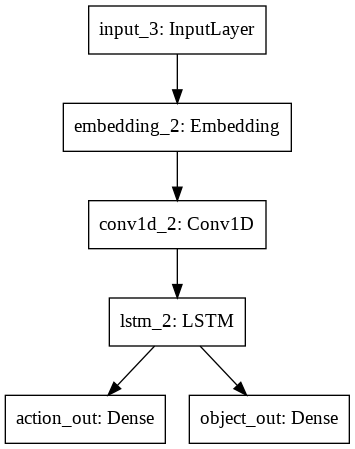

In [ ]:
from keras.utils.vis_utils import plot_model
plot_model(model_both_nn)